In [ ]:
from google.colab import files
uploaded = files.upload()

Saving startup.csv to startup.csv


In [ ]:
# importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
startup = pd.read_csv('/content/startup.csv')

In [ ]:
startup.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
startup.shape

(50, 5)

In [ ]:
# find the mean,min and max values 
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
# finding if there is any missing values 
startup.isna().any()


R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

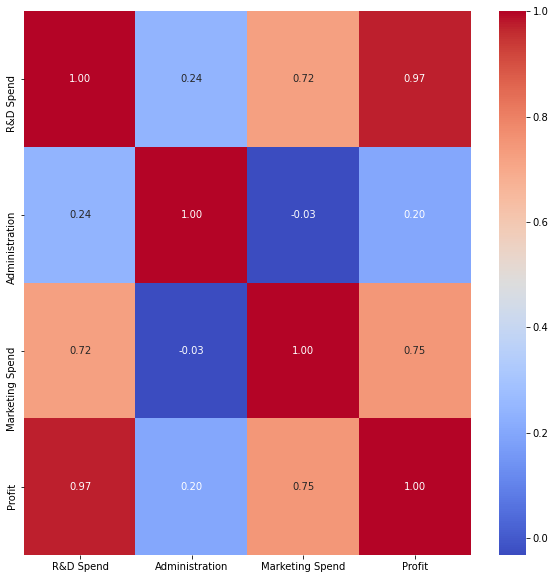

In [ ]:
# Lets find the correlation between the values using sns.heatmap
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(startup.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

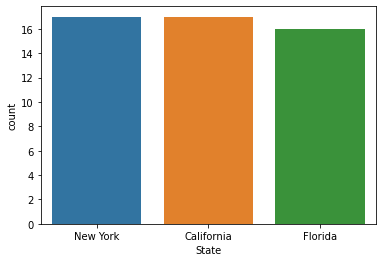

In [ ]:
# find the total no of customers from each city
sns.countplot(x='State',data=startup)

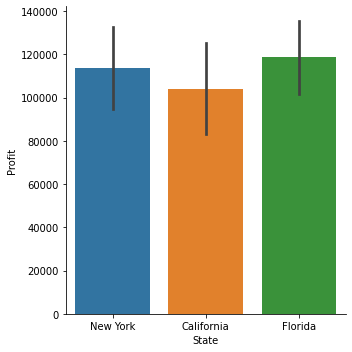

In [ ]:
# finding  the profit in each city
sns.catplot(x='State',y='Profit',kind='bar',data=startup)

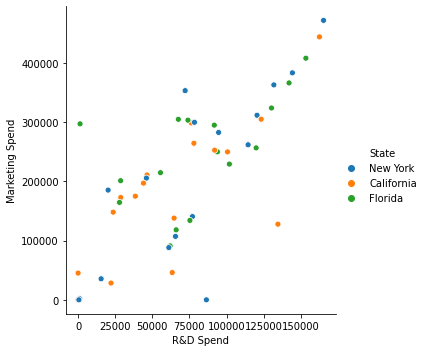

In [ ]:
# relationship between rd spent and marketing spend 
sns.relplot(x='R&D Spend',y='Marketing Spend',hue ='State',data=startup)

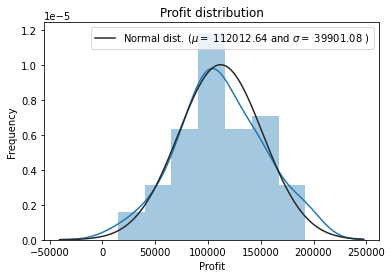

In [ ]:
# Profit distrubution
from scipy import stats
from scipy.stats import norm, skew #for some statistics
(mu, sigma) = norm.fit(startup['Profit'])

(mu, sigma) = norm.fit(startup['Profit'])
sns.distplot(startup['Profit'],fit=norm)
plt.ylabel('Frequency')
plt.title('Profit distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

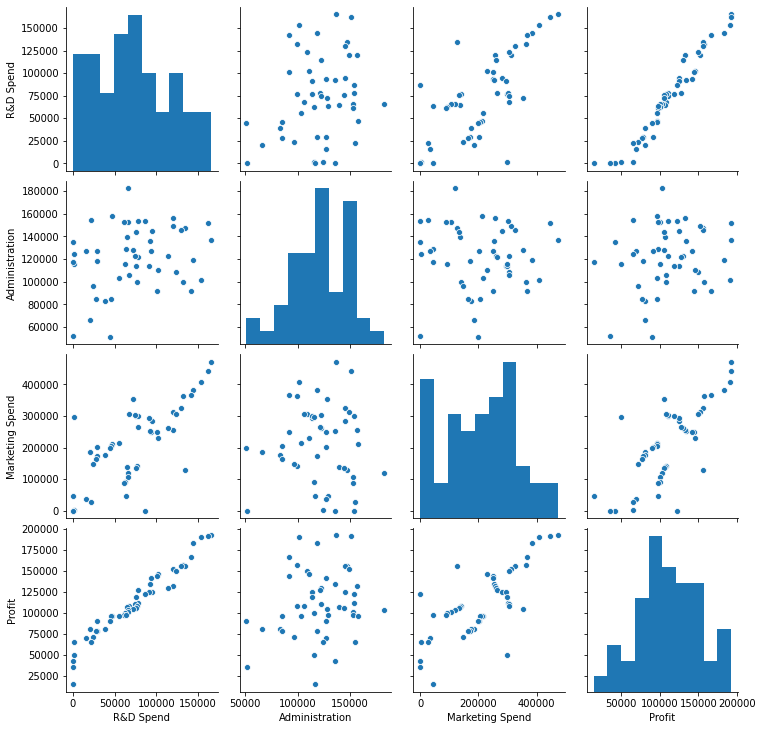

In [ ]:
# to view the various relationship we can use pairplot
sns.pairplot(startup)

In [ ]:
# since state variable is object we can encode the data.
# One hot encoder only takes numerical categorical values,
# hence any value of string type should be label encoded before one-hot encoded.
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()  
startup['State']= le.fit_transform(startup['State']) 

In [ ]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder()  
data = onehotencoder.fit_transform(startup.State.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(data, columns = ["State "+str(int(i)) for i in range(data.shape[1])]) 
df = pd.concat([startup, dfOneHot], axis=1)
#droping the country column 
df_startup = df.drop(['State'], axis=1) 
#printing to verify 
print(df_startup.head())

   R&D Spend  Administration  Marketing Spend  ...  State 0  State 1  State 2
0  165349.20       136897.80        471784.10  ...      0.0      0.0      1.0
1  162597.70       151377.59        443898.53  ...      1.0      0.0      0.0
2  153441.51       101145.55        407934.54  ...      0.0      1.0      0.0
3  144372.41       118671.85        383199.62  ...      0.0      0.0      1.0
4  142107.34        91391.77        366168.42  ...      0.0      1.0      0.0

[5 rows x 7 columns]


In [ ]:
df_startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State 0,State 1,State 2
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [ ]:
# training and testing 
from sklearn.model_selection import train_test_split
X = df_startup.drop(['Profit'],axis=1)
y = df_startup['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20)

In [ ]:
# Checking with all Regression model mae ,mse and r2 score 
# therfore we can choose best regression model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

[08:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,R2-score
Linear Regression,11133.348232,2.277710e+08,0.841340
Decision Tree,11654.670000,2.746204e+08,0.808705
Random Forest,9758.230570,1.989494e+08,0.861416
Support Vector Machines,30124.321565,1.595439e+09,-0.111348
K-nearest Neighbors,14798.053400,5.807292e+08,0.595477
XGBoost,9309.185937,1.549800e+08,0.892044


FROM ABOVE WE CAN SEE XGBOOST AND RANDOM FOREST ARE BEST MODEL.

THANK YOU..........